In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import seaborn as sns
import holidays

In [2]:
data = pd.read_csv('Wrangled_data_cap2.csv',encoding='latin-1',
                   index_col='Date',parse_dates=True).iloc[:,1:]
data = data.drop('Name')
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24160 entries, 2015-07-01 00:00:00 to 2018-04-02 15:00:00
Data columns (total 7 columns):
Demand(MW)      24128 non-null float64
Forecast(MW)    24135 non-null float64
Temp            24160 non-null float64
Name            1459 non-null object
holiday         24160 non-null int64
DofWk           24160 non-null float64
daylight        24160 non-null int64
dtypes: float64(4), int64(2), object(1)
memory usage: 1.5+ MB


,Demand(MW),Forecast(MW),Temp,Name,holiday,DofWk,daylight
Date,,,,,,,
2015-07-01 00:00:00,5250.0,5587.0,68.0,NaN,0,3.0,0
2015-07-01 01:00:00,4847.0,5447.0,68.0,NaN,0,3.0,0
2015-07-01 02:00:00,4593.0,5220.0,66.9,NaN,0,3.0,0
2015-07-01 03:00:00,4473.0,4960.0,70.0,NaN,0,3.0,0
2015-07-01 04:00:00,4512.0,4727.0,69.1,NaN,0,3.0,0


In [3]:
# group features by day
day1 = data.iloc[:,:2].groupby(pd.Grouper(freq='1D')).aggregate(np.sum)
weather = data.iloc[:,2:5].groupby(pd.Grouper(freq='1D')).aggregate(np.mean)
weekdays = data.iloc[:,5:6].groupby(pd.Grouper(freq='1D')).aggregate(np.max)
day1 = day1.merge(weather,right_index=True,left_index=True).merge(weekdays,
                 right_index=True,left_index=True)
for i in day1.iloc[:,:-2]:
    print('---------------\n','Max',i)
    print(day1[day1[i]== day1[i].max()])
print(day1.describe())

---------------
 Max Demand(MW)
            Demand(MW)  Forecast(MW)       Temp  holiday  DofWk
Date                                                           
2018-03-09    156550.0      147235.0  59.416364      0.0    7.0
---------------
 Max Forecast(MW)
            Demand(MW)  Forecast(MW)       Temp  holiday  DofWk
Date                                                           
2018-03-09    156550.0      147235.0  59.416364      0.0    7.0
---------------
 Max Temp
            Demand(MW)  Forecast(MW)       Temp  holiday  DofWk
Date                                                           
2015-09-09    121425.0      101415.0  87.629167      0.0    3.0
          Demand(MW)   Forecast(MW)         Temp      holiday        DofWk
count    1003.000000    1003.000000  1003.000000  1003.000000  1003.000000
mean    79093.280160   78185.738784    64.815617     0.032901     4.004985
std     12727.103589   11913.395463     8.860768     0.177355     2.003235
min     39073.000000   38467.000

In [4]:
#restructure weekdays df to allow easy plotting
weekdays = pd.DataFrame(day1['Demand(MW)'].values,index=day1.DofWk,columns=['Demand(MW)'])
weekdays.index=weekdays.index.map(str)

In [5]:
#grouped by week df
day7 = data.iloc[:,:2].groupby(pd.Grouper(freq='7D')).aggregate(np.sum)
weather7 = data.iloc[:,2:4].groupby(pd.Grouper(freq='7D')).aggregate(np.mean)
holidays7 = data.iloc[:,4:5].groupby(pd.Grouper(freq='7D')).aggregate(np.max)
day7 = day7.merge(weather7,right_index=True,left_index=True).merge(holidays7,
                 right_index=True,left_index=True)
for i in day7.iloc[:,:-1]:
    print('---------------\n','Max',i)
    print(day7[day7[i]== day7[i].max()])
print(day1.describe())

---------------
 Max Demand(MW)
            Demand(MW)  Forecast(MW)       Temp  holiday
Date                                                    
2017-08-30    810047.0      807483.0  82.594643        1
---------------
 Max Forecast(MW)
            Demand(MW)  Forecast(MW)       Temp  holiday
Date                                                    
2017-08-30    810047.0      807483.0  82.594643        1
---------------
 Max Temp
            Demand(MW)  Forecast(MW)       Temp  holiday
Date                                                    
2017-08-30    810047.0      807483.0  82.594643        1
          Demand(MW)   Forecast(MW)         Temp      holiday        DofWk
count    1003.000000    1003.000000  1003.000000  1003.000000  1003.000000
mean    79093.280160   78185.738784    64.815617     0.032901     4.004985
std     12727.103589   11913.395463     8.860768     0.177355     2.003235
min     39073.000000   38467.000000     0.000000     0.000000     1.000000
25%     71244.500000

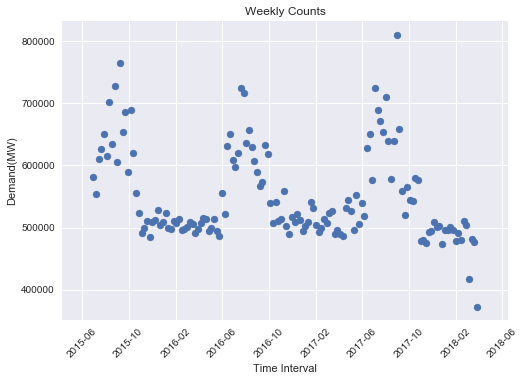

          Demand(MW)
count     144.000000
mean   550906.666667
std     73859.702344
min    372985.000000
25%    499526.750000
50%    518044.000000
75%    599445.250000
max    810047.000000


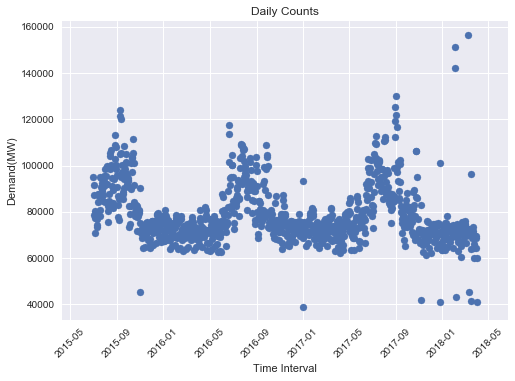

          Demand(MW)
count    1003.000000
mean    79093.280160
std     12727.103589
min     39073.000000
25%     71244.500000
50%     75259.000000
75%     84858.500000
max    156550.000000


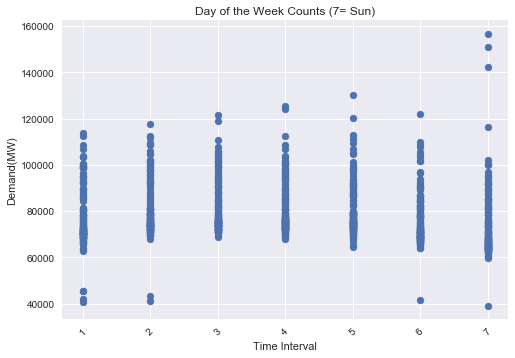

          Demand(MW)
count    1003.000000
mean    79093.280160
std     12727.103589
min     39073.000000
25%     71244.500000
50%     75259.000000
75%     84858.500000
max    156550.000000


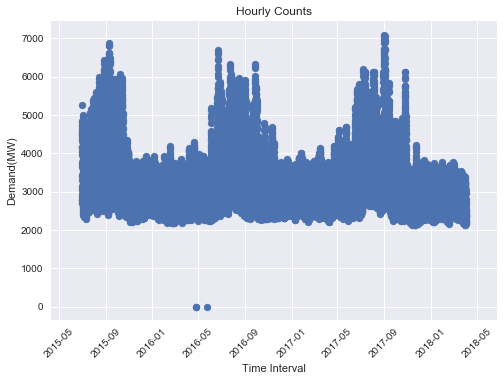

         Demand(MW)
count  24128.000000
mean    3287.904509
std      754.253462
min        0.000000
25%     2730.750000
50%     3185.000000
75%     3591.000000
max     7095.000000


In [6]:
#Demand Over Time Visualization
titles= ['Weekly Counts','Daily Counts','Day of the Week Counts (7= Sun)',
         'Hourly Counts']

for i,t in zip([day7['Demand(MW)'],day1['Demand(MW)'],weekdays,data['Demand(MW)']],titles):
    try:
        i = i.to_frame('Demand(MW)')
        plt.scatter(i.index,i['Demand(MW)'])
        plt.xticks(rotation=45)
        plt.title(t)
        plt.ylabel('Demand(MW)')
        plt.xlabel('Time Interval')
        plt.show()
        print(i.describe())
    except:
        plt.scatter(i.index,i['Demand(MW)'])
        plt.xticks(rotation=45)
        plt.title(t)
        plt.ylabel('Demand(MW)')
        plt.xlabel('Time Interval')
        plt.show()
        print(i.describe())

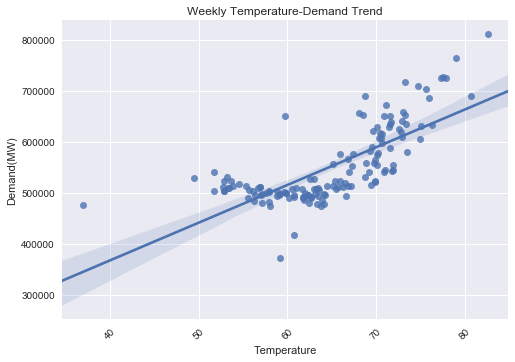

          Demand(MW)   Forecast(MW)        Temp     holiday
count     144.000000     144.000000  144.000000  144.000000
mean   550906.666667  544585.388889   64.792997    0.194444
std     73859.702344   72049.542577    7.458591    0.397154
min    372985.000000  369048.000000   36.886905    0.000000
25%    499526.750000  495176.000000   59.484191    0.000000
50%    518044.000000  515494.000000   64.788690    0.000000
75%    599445.250000  593978.000000   70.474702    0.000000
max    810047.000000  807483.000000   82.594643    1.000000


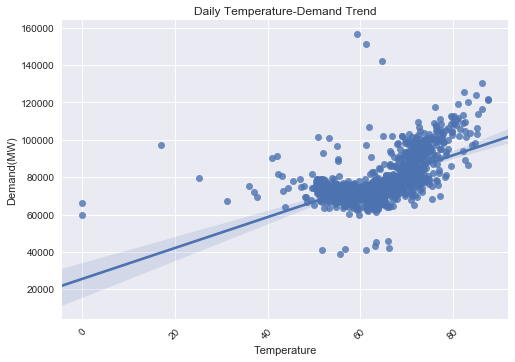

          Demand(MW)   Forecast(MW)         Temp      holiday        DofWk
count    1003.000000    1003.000000  1003.000000  1003.000000  1003.000000
mean    79093.280160   78185.738784    64.815617     0.032901     4.004985
std     12727.103589   11913.395463     8.860768     0.177355     2.003235
min     39073.000000   38467.000000     0.000000     0.000000     1.000000
25%     71244.500000   70887.000000    59.510417     0.000000     2.000000
50%     75259.000000   74901.000000    64.808333     0.000000     4.000000
75%     84858.500000   84292.000000    71.031250     0.000000     6.000000
max    156550.000000  147235.000000    87.629167     1.000000     7.000000


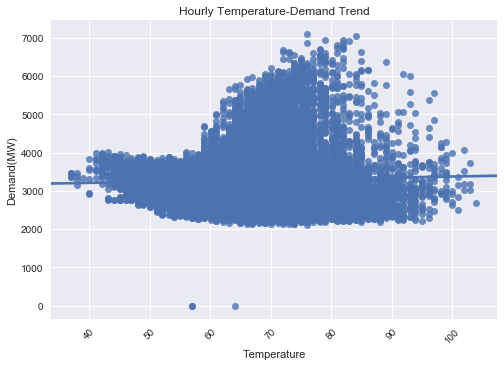

         Demand(MW)  Forecast(MW)          Temp       holiday         DofWk  \
count  23647.000000  23654.000000  23678.000000  23678.000000  23678.000000   
mean    3282.849622   3244.505623     66.117717      0.032520      4.007011   
std      750.852602    739.554540      9.682535      0.177379      1.997642   
min        0.000000   2100.000000     37.000000      0.000000      1.000000   
25%     2727.000000   2687.000000     59.000000      0.000000      2.000000   
50%     3182.000000   3138.000000     66.000000      0.000000      4.000000   
75%     3587.000000   3568.000000     72.000000      0.000000      6.000000   
max     7095.000000   7043.000000    104.000000      1.000000      7.000000   

           daylight  
count  23678.000000  
mean       0.469170  
std        0.499059  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        1.000000  
max        1.000000  


In [11]:
#Demand vs. Temp Visualization
titles2= ['Weekly Temperature-Demand Trend','Daily Temperature-Demand Trend',
         'Hourly Temperature-Demand Trend']

for i,t in zip([day7,day1,data[data['Temp']!=0]],titles2):
        sns.regplot(x="Temp", y="Demand(MW)", data=i)
        plt.xticks(rotation=45)
        plt.title(t)
        plt.xlabel('Temperature')
        plt.ylabel('Demand(MW)')
        plt.show()
        print(i.describe())

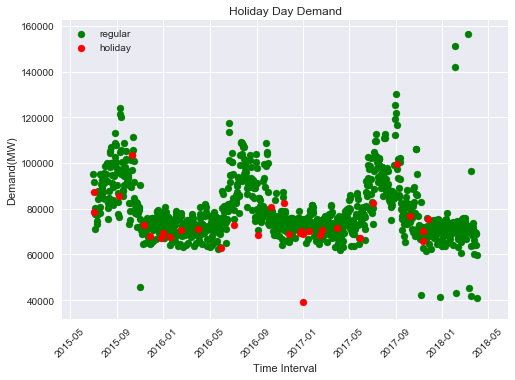

---------------
 Holiday Day Stats
          Demand(MW)  Forecast(MW)       Temp  holiday      DofWk
count      32.000000      32.00000  32.000000     32.0  32.000000
mean    73263.718750   73103.12500  62.457396      1.0   2.968750
std     11160.838063   10788.81749  10.502233      0.0   2.117277
min     39073.000000   38467.00000  31.141667      1.0   1.000000
25%     68657.000000   68896.25000  55.685833      1.0   1.000000
50%     70460.500000   71721.00000  63.160417      1.0   2.500000
75%     77422.000000   74321.75000  69.442708      1.0   5.000000
max    103615.000000  103997.00000  83.725000      1.0   7.000000
---------------
 Holiday Day Top 5 Demand
            Demand(MW)  Forecast(MW)       Temp  holiday  DofWk
Date                                                           
2015-10-12    103615.0       92714.0  83.725000      1.0    1.0
2017-09-04     99413.0      103997.0  77.645833      1.0    1.0
2015-07-03     87131.0       95400.0  69.400000      1.0    5.0
2015-09-0

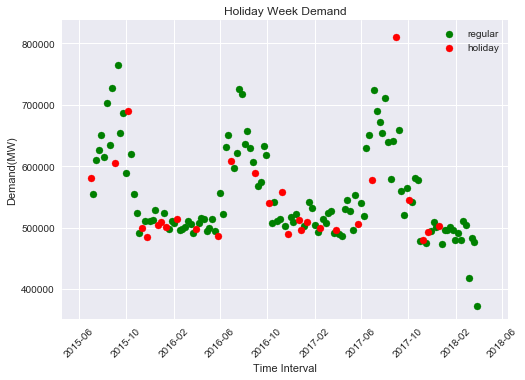

---------------
 Holiday Week Stats
          Demand(MW)   Forecast(MW)       Temp  holiday
count      28.000000      28.000000  28.000000     28.0
mean   538598.214286  534385.392857  63.388053      1.0
std     72506.323195   69657.429608   8.469927      0.0
min    479982.000000  475273.000000  51.710119      1.0
25%    497414.750000  492584.000000  56.097768      1.0
50%    507519.000000  512582.000000  63.500000      1.0
75%    562790.750000  563634.750000  69.276190      1.0
max    810047.000000  807483.000000  82.594643      1.0
---------------
 Holiday Week Top 5 Demand
            Demand(MW)  Forecast(MW)       Temp  holiday
Date                                                    
2017-08-30    810047.0      807483.0  82.594643        1
2015-10-07    689287.0      630016.0  80.670833        1
2016-06-29    607920.0      601605.0  70.336905        1
2015-09-02    605056.0      562500.0  74.930952        1
2016-08-31    589395.0      586620.0  69.581548        1


In [14]:
#Holiday by Week and Day
for i,t in zip([day1,day7],['Day','Week']):
    plt.scatter(i[i['holiday']==0].index,i[i['holiday']==0]['Demand(MW)'],
                color='green')
    plt.scatter(i[i['holiday']==1].index,i[i['holiday']==1]['Demand(MW)'],
                color='red')
    plt.xticks(rotation=45)
    plt.title('Holiday %s Demand'%t)
    plt.legend(['regular','holiday'])
    plt.ylabel('Demand(MW)')
    plt.xlabel('Time Interval')
    plt.show()
    print('---------------\n','Holiday %s Stats'%t)
    print(i[i['holiday']==1].describe())
    print('---------------\n','Holiday %s Top 5 Demand'%t)
    print(i[i['holiday']==1].sort_values(by='Demand(MW)',ascending=False).head(5))

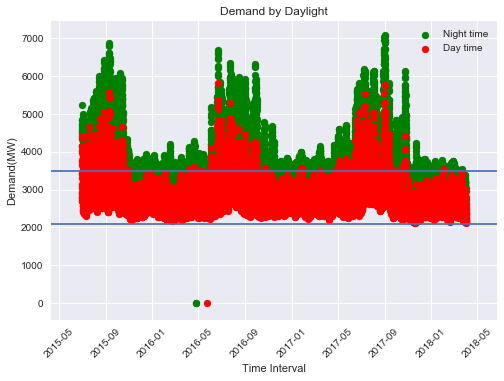

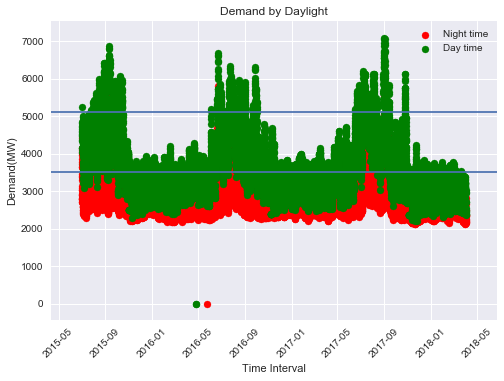

In [13]:
#Demand by Daylight
plt.scatter(data[data['daylight']==0].index,data[data['daylight']==0]['Demand(MW)'],
            color='green')
plt.scatter(data[data['daylight']==1].index,data[data['daylight']==1]['Demand(MW)'],
            color='red')
plt.legend(['Night time','Day time'])
plt.axhline(2100)
plt.axhline(3500)
plt.xticks(rotation=45)
plt.ylabel('Demand(MW)')
plt.xlabel('Time Interval')
plt.title('Demand by Daylight')
plt.show()

plt.scatter(data[data['daylight']==1].index,data[data['daylight']==1]['Demand(MW)'],
            color='red')
plt.scatter(data[data['daylight']==0].index,data[data['daylight']==0]['Demand(MW)'],
            color='green')
plt.legend(['Night time','Day time'])
plt.axhline(5100)
plt.axhline(3500)
plt.xticks(rotation=45)
plt.ylabel('Demand(MW)')
plt.xlabel('Time Interval')
plt.title('Demand by Daylight')
plt.show()